In [1]:
# %load /home/hwixley/Documents/Year3/IAML/cwk2/INFR10069-2020-CW2/helpers/iaml01cw2_helpers.py
#
#  Helper functions for IAML 2020/21 cw2
#
import os
import gzip
import numpy as np

#
#  This function is after  https://github.com/zalandoresearch/fashion-mnist
#
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

#
#------ IAML original functions ---------------
#
def load_FashionMNIST(data_path):
    Xtrn, Ytrn = load_mnist(data_path, "train")
    Xtst, Ytst = load_mnist(data_path, "t10k")
    return Xtrn.astype(np.float), Ytrn, Xtst.astype(np.float), Ytst

def load_CoVoST2(data_path):
    data = np.load(data_path+'/speech_trn.npz', allow_pickle=True)
    Xtrn, Ytrn = data['Xtrn'], data['Ytrn']
    data = np.load(data_path+'/speech_tst.npz', allow_pickle=True)
    Xtst, Ytst = data['Xtst'], data['Ytst']
    return Xtrn, Ytrn, Xtst, Ytst


In [249]:

##########################################################
#  Python script template for Question 2 (IAML Level 10)
#  Note that
#  - You should not change the filename of this file, 'iaml01cw2_q2.py', which is the file name you should use when you submit your code for this question.
#  - You should define the functions shown below in your code.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define helper functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission
##########################################################

#--- Code for loading the data set and pre-processing --->
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("/home/hwixley/Documents/Year3/IAML/cwk2/INFR10069-2020-CW2/data")
Xtrn_orig = Xtrn.copy
Xtst_orig = Xtst.copy
Xtrn = Xtrn/255
Xtst = Xtst/255

Xmean = Xtrn.mean(0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean
#<----

# Q2.1
def iaml01cw2_q2_1():
    from sklearn.linear_model import LogisticRegression
    import pandas as pd
    
    print("starting...")
    print()
    lr = LogisticRegression()
    lr.fit(Xtrn_nm,Ytrn)
    pred = lr.predict(Xtst_nm)
    
    print("FREQUENCY CONFUSION MATRIX:")
    print()
    cm = pd.crosstab(pred,Ytst,rownames=["Actual"],colnames=["Predicted"])
    print(cm.round(3))
    print()
    print()
    print("PERCENTAGE CONFUSION MATRIX:")
    print()
    cm2 = cm/np.sum(cm,axis=1)
    print((cm2*100).round(1))
    print()
    print()
    print("Total classification accuracy = " + str((((cm*np.identity(10)).sum().sum()/cm.sum().sum())*100).round(3)) + "%")
    
#
# iaml01cw2_q2_1()   # comment this out when you run the function

# Q2.2
def iaml01cw2_q2_2():
    from sklearn.svm import SVC
    import pandas as pd
    
    print("starting...")
    print()
    svc = SVC(kernel = "rbf", C=1.0, gamma = "auto")
    svc.fit(Xtrn_nm,Ytrn)
    pred = svc.predict(Xtst_nm)
    
    print("FREQUENCY CONFUSION MATRIX:")
    print()
    cm = pd.crosstab(pred,Ytst,rownames=["Actual"],colnames=["Predicted"])
    print(cm.round(3))
    print()
    print()
    print("PERCENTAGE CONFUSION MATRIX:")
    print()
    cm2 = cm/np.sum(cm,axis=1)
    print((cm2*100).round(1))
    print()
    print()
    print("Mean classification accuracy = " + str((((cm2*np.identity(10)).sum().sum()/10)*100).round(3)) + "%")
    
#
# iaml01cw2_q2_2()   # comment this out when you run the function

# Q2.3
def iaml01cw2_q2_3():
    from sklearn.linear_model import LogisticRegression
    from sklearn.decomposition import PCA
    import statistics as stats

    print("starting...")
    print()
    lr = LogisticRegression()
    lr.fit(Xtrn_nm[0:40,],Ytrn[0:40,])
    pred = lr.predict(Xtst_nm)

    pca = PCA(n_components=2)
    pca.fit(Xtrn_nm)
    newXtst_nm = pca.transform(Xtst_nm)

    z0 = newXtst_nm[:,0]
    z1 = newXtst_nm[:,1]
    
    z = np.zeros((10000,784))
    z[:,0] = z0
    z[:,1] = z1
    
    pc0 = pca.components_[0]
    pc1 = pca.components_[1]
    
    print(z.shape)
    print(z0.shape)
    print(pc0.shape)
    print(pc1.shape)
    
    cs = plt.contourf(pc0,Ytst,z,cmap=plt.cm.coolwarm)
        
    cbar = plt.colorbar(cs)
    cbar.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
    
    pc0Stdev = stats.stdev(pc0)
    pc1Stdev = stats.stdev(pc1)
    plt.xlim(-5*pc0Stdev,5*pc0Stdev)
    plt.ylim(-5*pc1Stdev,5*pc1Stdev)
    
    plt.axhline(0, color='white')
    plt.axvline(0, color='white')
    plt.show()
#
# iaml01cw2_q2_3()   # comment this out when you run the function

# Q2.4
#def iaml01cw2_q2_4():
#
# iaml01cw2_q2_4()   # comment this out when you run the function

# Q2.5
#def iaml01cw2_q2_5():
#
# iaml01cw2_q2_5()   # comment this out when you run the function

# Q2.6 
#def iaml01cw2_q2_6():
#
# iaml01cw2_q2_6()   # comment this out when you run the function



starting...

(10000, 784)
(784,)
(784,)


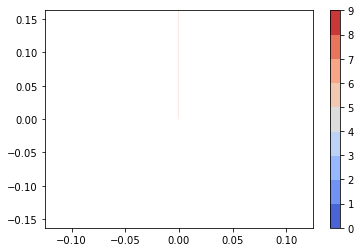

In [250]:
iaml01cw2_q2_3()